In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import os

In [25]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../OutputtoTelegram")
df = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df['Time'] = df['Time'].astype('datetime64[ns]')
df['ts'] = df[['Time']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

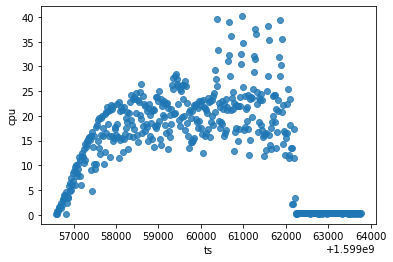

In [26]:
sns.regplot('ts','cpu', data=df, fit_reg=False)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df[['cpu', 'mem', 'replica', 'requests']], df['responsetime'], test_size=0.1))

In [33]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train.values.reshape(-1,4), y_train)
    print(clf.score(X_test.values.reshape(-1,4), y_test.values.reshape(-1,1)),'\n')

SVR()
0.42862364066222614 

SGDRegressor()
-1.3141887374597563e+33 

BayesianRidge()
0.724559270183166 

LassoLars()
-0.01739809038838147 

ARDRegression()
0.6173638993044361 

PassiveAggressiveRegressor()
0.5165335734229164 

LinearRegression()
0.7249042763578222 



In [34]:
from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,4), y_train)

SVR()

In [35]:
print('Score: ', reg.score(X_test.values.reshape(-1,4), y_test.values.reshape(-1,1)))

Score:  0.42862364066222614


Score:  0.3271925222401314


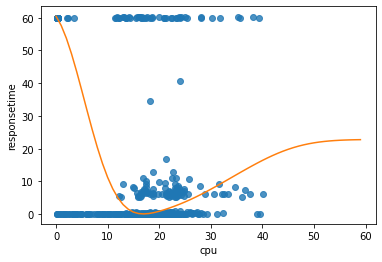

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['cpu'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,60).reshape(-1,1)
sns.regplot('cpu','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

Score:  -0.11415974328259715


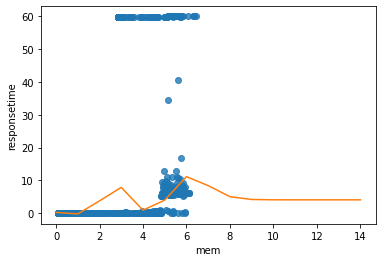

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['mem'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,15).reshape(-1,1)
sns.regplot('mem','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

Score:  -0.12608744415636153


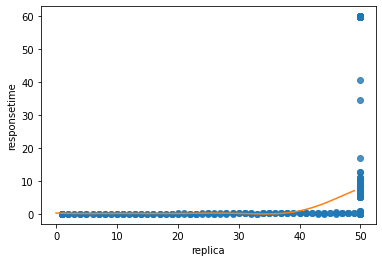

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['replica'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,50).reshape(-1,1)
sns.regplot('replica','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

Score:  0.42028119037109757


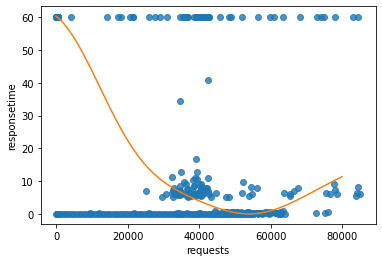

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['requests'], df['responsetime'], test_size=0.1))

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train.values.reshape(-1,1), y_train)
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
x_line = np.arange(0,80000).reshape(-1,1)
sns.regplot('requests','responsetime', data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

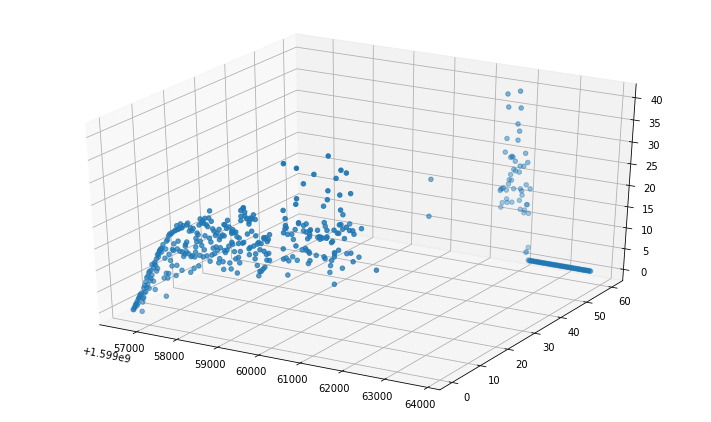

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df['ts'], ys=df['responsetime'], zs=df['cpu'])

Score:  0.02231466423227757


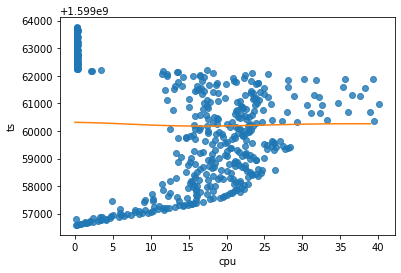